In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
import random as rdm
import math

import matplotlib.pyplot as plt


# Scikit Imports
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Packages for analysis
import pandas as pd


In [14]:
J = []
Jtrain = []
Jtest = []
Jini = 0.25
Jfin = 1.75
datos = 1000
delta=(Jfin-Jini)/datos
train= []


#intervaltraining

[ J.append (Jini + (Jfin-Jini)/datos * i) for i in range (datos)]
[ Jtrain.append (J[i]) for i in range (datos) if J[i] < 0.7  and J[i] > 0.6 ]
[ Jtrain.append (J[i]) for i in range (datos) if J[i] < 1.7  and J[i] > 1.6 ]
[ Jtest.append (J[i]) for i in range (datos) if J[i] not in Jtrain]

#randomtraining

"""for i in range (180):
    n=rdm.randint(0,1000)
    if len(train)<132:
        if n not in train:
            train.append(n)            

[ J.append (Jini + delta * i) for i in range (datos) ]
[ Jtrain.append(J[i]) for i in train ]
[ Jtest.append (J[i]) for i in range (datos) if J[i] not in Jtrain ]
"""

teorico_train=[]
teorico_test=[]
teorico_todo=[]

[ teorico_train.append(0) if Jtrain[i] < 1  else teorico_train.append(1) for i in range (len (Jtrain)) ]
[ teorico_test.append(0) if Jtest[i] < 1  else teorico_test.append(1) for i in range (len (Jtest)) ]
[ teorico_todo.append(0) if J[i] < 1  else teorico_todo.append(1) for i in range (len (J) ) ]


print(len(teorico_test))
print(len(teorico_train))



868
132


In [15]:
#kernel JW (log-lambda)

def f_fidelity(J1, J2, N):
    ks = (2 * np.arange(0, int(N / 2)) + 1) * np.pi / N
    
    uk1s = f_uk(J1, ks)
    uk2s = f_uk(J2, ks)
    
    vk1s = f_vk(J1, ks)
    vk2s = f_vk(J2, ks)
    
    factors = uk1s * uk2s + vk1s * vk2s
    
    return np.abs(np.prod(factors))

# we define the log (lambda), following Zhou.

def f_loglam(J1, J2, N):
    ks = (2 * np.arange(0, int(N / 2)) + 1) * np.pi / N
    
    uk1s = f_uk(J1, ks)
    uk2s = f_uk(J2, ks)
    
    vk1s = f_vk(J1, ks)
    vk2s = f_vk(J2, ks)
    
    factors = np.log(np.abs(uk1s * uk2s + vk1s * vk2s))
    
    return np.sum(factors)/N

def f_ϵk(J, k):
    return np.sqrt(J ** 2 - 2 * J * np.cos(k) + 1)

def f_zk(J, k):
    return 1 - J * np.cos(k)

def f_yk(J, k):
    return J * np.sin(k)

def f_uk(J, k):
    ϵk = f_ϵk(J, k)
    zk = f_zk(J, k)
    yk = f_yk(J, k)
    
    return np.sqrt((ϵk + zk) / (2 * ϵk))

def f_vk(J, k):
    ϵk = f_ϵk(J, k)
    zk = f_zk(J, k)
    yk = f_yk(J, k)
    
    return yk / np.sqrt(2 * ϵk * (ϵk + zk))

def f_suscept(F, Js):
    deltaJ = Js[1] - Js[0]
    return (1 - F) / deltaJ ** 2



def kernelJW_ll_alt (J1s, J2s, N):
    ker = np.array([[f_fidelity(J1, J2, N) for J2 in J2s] for J1 in J1s])
    #ker= ker**(1./N)
    #ker = np.log(ker) / N
    
    return ker

In [16]:
Ns = np.arange(100, 1201, 100)

for N in Ns:
    print(N)
    kernel_train = kernelJW_ll_alt(Jtrain, Jtrain, N)
    
    #print(ker_alt)

    """ktrainfile= 'dataJW/kerneltrain'  + str(N)
    np.save(ktrainfile, kernel_train)"""
 
    kernel_test = kernelJW_ll_alt(Jtest, Jtrain, N)
    kernel_todo = kernelJW_ll_alt(J, Jtrain, N)
    kernelsave = kernelJW_ll_alt(J, J, N)
   
    
    """plt.imshow(kernelsave,vmin=0,vmax=1, cmap = 'gray')
    plt.show()
    plt.imshow(kernelsave2,vmin=0,vmax=1, cmap = 'gray')
    plt.show()"""
    

    #Aplicamos el modelo
    model = svm.SVC(kernel = 'precomputed' )
    model.fit (kernel_train, teorico_train)
    y_train = model.predict(kernel_train)
    y_test = model.predict(kernel_test)
    distance=model.decision_function(kernel_todo)
    supportvs=model.support_
    #print(np.shape(distance))
    print(N)

    sv=[]
    jsv=[]
    for i, n in enumerate(supportvs):
        jsv.append(Jtrain[n])


        #Cálculo del accuracy  
    print(confusion_matrix(teorico_test,y_test))
    print(classification_report(teorico_test,y_test))

            #Saving data
    Jtrainfile= 'dataJW/revisited/KernelFidelity/Jtrain_ll_06-07_16-17' + str(N)
    kernelfile = 'dataJW/revisited/KernelFidelity/Kernel_ll_06-07_16-17' + str(N)
    distancefile =  'dataJW/revisited/KernelFidelity/distance_ll_06-07_16-17'  + str(N)
    supportfile= 'dataJW/revisited/KernelFidelity/supportvs_ll_06-07_16-17'  + str(N)
    data_distance = np.array([J, distance])
    np.save(Jtrainfile, Jtrain)
    np.save(kernelfile, kernelsave)
    np.save(distancefile, data_distance)
    np.save(supportfile, jsv)


100
100
[[434   0]
 [  4 430]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       434
           1       1.00      0.99      1.00       434

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

200
200
[[434   0]
 [  7 427]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       434
           1       1.00      0.98      0.99       434

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868

300
300
[[434   0]
 [ 29 405]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       434
           1       1.00      0.93      0.97       434

    accuracy                           0.97       868
   macro avg       0.97      0.97  

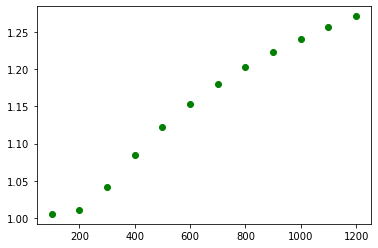

In [17]:
Jcsdisc = []

Ns = np.arange(100, 1201, 100)

for N in Ns:
    distancefile =  'dataJW/revisited/KernelFidelity/distance_ll_06-07_16-17'  + str(N) + '.npy'
    data_distance = np.load(distancefile, allow_pickle = True)
    
    Js= data_distance[0]
    ds=data_distance[1]
    
    """supportfile= 'dataJW/revisited/supportvs_ll'  + str(N)  + '.npy'
    support = np.load(supportfile, allow_pickle = True)"""

    mod_ds = np.abs(ds)
    idx = np.argmin(mod_ds)
    if ds[idx] < 0:
        Jl = Js[idx]
        dl = ds[idx]
        Jr = Js[idx + 1]
        dr = ds[idx + 1]

    else:
        Jl = Js[idx - 1]
        dl = ds[idx - 1]
        Jr = Js[idx]
        dr = ds[idx]

    Jcdistance = (Jl * dr - Jr * dl) / (dr - dl)
    Jcsdisc.append(Jcdistance)
    
Jcsdisc = np.array(Jcsdisc)
plt.plot(Ns, Jcsdisc, label = 'λ', c='green',  lw = 0, marker = 'o')
plt.show()


nu =  0.9392282859008425
[[ 5.14145420e-04 -5.83901001e-05]
 [-5.83901001e-05  6.65001841e-06]]


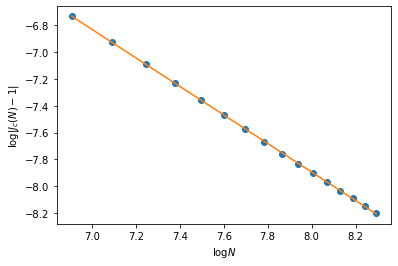

In [14]:
#### log log fit ####

from scipy.optimize import curve_fit

logNs = np.log(Ns)
logdeltaJcs = np.log(np.abs(Jcsdisc - 0.995936749173636))
plt.plot(logNs, logdeltaJcs, lw = 0, marker = 'o')

f = lambda logN, a, ν: a - (1 / ν) * logN

popt, pcov = curve_fit(f, logNs, logdeltaJcs)

plt.plot(logNs, f(logNs, popt[0], popt[1]))
print('nu = ', popt[1])
print(pcov)


plt.xlabel(r'$\log N$')
plt.ylabel(r'$\log |J_c(N) - 1|$')
plt.show()

nu =  0.9376882342220793
b =  0.995936749173636
a =  -1.891005801093586
[[2.07086217e-02 9.06374244e-07 1.47016822e-03]
 [9.06374244e-07 4.19223355e-11 6.47580682e-08]
 [1.47016822e-03 6.47580682e-08 1.04460264e-04]]


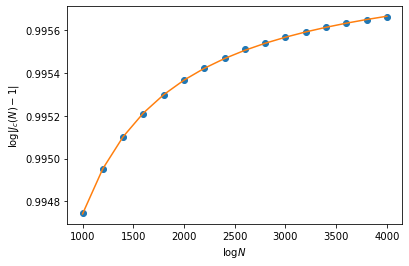

In [15]:
####  fit ####

from scipy.optimize import curve_fit

#logNs = np.log(Ns)
#logdeltaJcs = np.log(np.abs(Jcsdisc - 1))
plt.plot(Ns, Jcsdisc, lw = 0, marker = 'o')

f = lambda N, a, b, ν: b+ a * N**(-1. / ν)

popt, pcov = curve_fit(f, Ns, Jcsdisc)

plt.plot(Ns, f(Ns, popt[0], popt[1], popt[2]))
print('nu = ', popt[2])
print('b = ', popt[1])
print('a = ', popt[0])
print(pcov)



plt.xlabel(r'$\log N$')
plt.ylabel(r'$\log |J_c(N) - 1|$')
plt.show()